In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sqlalchemy import create_engine

In [5]:
%matplotlib inline
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["image.cmap"] = "Spectral"

In [6]:
eng = create_engine("sqlite:///lamost.db")
qst = "SELECT * FROM 'star' LIMIT 10"
ans = pd.read_sql(qst, eng)
ans.describe()

,index,obsid,lmjd,mjd,spid,fiberid,ra_obs,dec_obs,snru,snrg,...,ra,dec,teff,teff_err,logg,logg_err,feh,feh_err,rv,rv_err
count,10.00000,10.000000,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.50000,101016.500000,55859.0,55858.0,1.0,16.500000,332.244661,-1.935940,1.950000,22.939000,...,332.244661,-1.935940,5393.693000,237.637000,4.308900,0.377800,-0.449000,0.224000,-1.141000,8.655000
std,3.02765,8.100069,0.0,0.0,0.0,8.100069,0.264699,0.128466,1.833333,11.632734,...,0.264699,0.128466,540.406956,99.747279,0.236417,0.153479,0.453448,0.092068,28.984453,3.458459
min,0.00000,101001.000000,55859.0,55858.0,1.0,1.000000,331.551234,-2.136096,0.190000,7.140000,...,331.551234,-2.136096,4386.750000,76.230000,3.986000,0.125000,-1.170000,0.073000,-38.940000,4.790000
25%,2.25000,101010.750000,55859.0,55858.0,1.0,10.750000,332.210594,-2.009582,1.187500,13.802500,...,332.210594,-2.009582,5234.372500,149.085000,4.142500,0.244750,-0.669750,0.143500,-22.592500,6.770000
50%,4.50000,101018.500000,55859.0,55858.0,1.0,18.500000,332.296571,-1.939909,1.270000,21.875000,...,332.296571,-1.939909,5572.695000,263.740000,4.292500,0.417500,-0.395500,0.247000,-3.940000,7.515000
75%,6.75000,101022.500000,55859.0,55858.0,1.0,22.500000,332.364404,-1.881452,2.285000,29.855000,...,332.364404,-1.881452,5684.187500,308.587500,4.393750,0.491000,-0.178250,0.292750,18.582500,8.660000
max,9.00000,101026.000000,55859.0,55858.0,1.0,26.000000,332.506374,-1.684356,6.780000,42.790000,...,332.506374,-1.684356,6093.270000,351.050000,4.709000,0.547000,0.309000,0.326000,50.370000,16.010000


In [10]:
tip = ["teff", "logg", "feh"]
sql = "SELECT {} FROM 'star'"\
      .format(",".join(tip))
dat = pd.read_sql(sql, eng)

CPU times: user 15.5 s, sys: 352 ms, total: 15.9 s
Wall time: 11 s


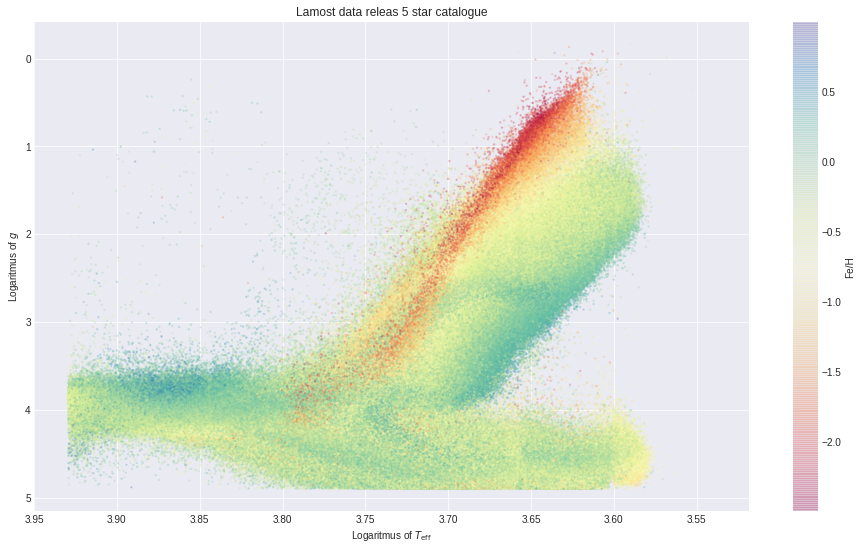

In [17]:
%%time
plt.title("Lamost data releas 5 star catalogue")
plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
plt.ylabel("Logaritmus of $g$")
plt.scatter(np.log10(dat.teff), dat.logg, c=dat.feh,
            cmap="Spectral", s=2, alpha=0.2)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar().ax.set_ylabel("Fe/H")

In [14]:
std = StandardScaler().fit(dat)
sam = dat.sample(frac=0.01)
tra = std.transform(sam)
np.save("sample.npy", tra)
len(sam)

53474